<a href="https://www.kaggle.com/code/shag2003/knn-algorithms?scriptVersionId=172856363" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
dataset = pd.read_csv('/kaggle/input/phishing-urls/Preprocessed_data.csv')
dataset.head()

,login_form,links_in_tags,iframe,popup_window,safe_anchor,onmouseover,right_clic,whois_registered_domain,domain_registration_length,domain_age,...,having_ip_address,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,count_special_chars,status
0,0,80.000000,0,0,0.0,0,0,0,45,-1,...,1,3,0,1,-1,37,-1,-1,7,legitimate
1,0,100.000000,0,0,100.0,0,0,0,77,5767,...,1,1,0,1,-1,77,-1,-1,7,phishing
2,0,100.000000,0,0,100.0,0,0,0,14,4004,...,1,4,1,-1,1,126,-1,1,19,phishing
3,0,100.000000,0,0,62.5,0,0,0,62,-1,...,1,2,0,1,-1,18,-1,-1,5,legitimate
4,1,76.470588,0,0,0.0,0,0,0,224,8175,...,1,2,0,1,-1,55,-1,-1,10,legitimate


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
y = np.where(y == "phishing", 1, -1)
y

array([-1,  1,  1, ..., -1, -1,  1])

## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [6]:
print(X_train)

[[  0.           0.           0.         ...  -1.          -1.
   11.        ]
 [  0.          64.70588235   0.         ...  -1.          -1.
    6.        ]
 [  0.          77.77777778   0.         ...   1.          -1.
    9.        ]
 ...
 [  0.           0.           0.         ...  -1.          -1.
   14.        ]
 [  0.         100.           0.         ...  -1.          -1.
    8.        ]
 [  0.           0.           0.         ...  -1.          -1.
   10.        ]]


In [7]:
print(y_train)

[ 1  1 -1 ...  1  1  1]


In [8]:
print(X_test)

[[  0.          75.           0.         ...  -1.          -1.
    6.        ]
 [  0.           0.           0.         ...  -1.          -1.
   10.        ]
 [  0.           0.           0.         ...  -1.          -1.
    6.        ]
 ...
 [  0.           0.           0.         ...  -1.          -1.
    8.        ]
 [  0.         100.           0.         ...  -1.          -1.
    5.        ]
 [  0.          93.33333333   0.         ...   1.          -1.
   10.        ]]


In [9]:
print(y_test)

[-1  1  1 ...  1 -1  1]


In [10]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test) #avoid data leakage

In [13]:
def calculate_metrics(actual, predicted):
    if not isinstance(predicted, np.ndarray):
        predicted = np.array(predicted)
    matrix = np.zeros((2, 2))
    n_samples = actual.shape[0]
    for i in range(n_samples):
        if actual[i] == predicted[i] and actual[i] == 1:
            matrix[0, 0] += 1  # True Positive
        elif actual[i] == predicted[i]:
            matrix[1, 1] += 1  # True Negative
        elif predicted[i] == 1:
            matrix[0, 1] += 1  # False Positive
        else:
            matrix[1, 0] += 1  # False Negative
    
    # Calculate precision, recall, and F1 score
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1]) if (matrix[0,0] + matrix[0,1]) > 0 else 0
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0]) if (matrix[0,0] + matrix[1,0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = np.sum(np.diag(matrix)) / np.sum(matrix) 

    labels = ['Actual Positive', 'Actual Negative']
    print("\t\tPredicted Positive\tPredicted Negative")
    for i, row_label in enumerate(labels):
        print(f"{row_label}\t\t{int(matrix[i,0])}\t\t\t{int(matrix[i,1])}")

    # Print precision, recall, and F1 score
    print("\nPrecision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

    # Plotting the confusion matrix
    plt.figure(figsize=(4, 4))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Actual Pos', 'Actual Neg'])
    plt.yticks(tick_marks, ['Pred Positive', 'Pred Negative'])

    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, matrix[i, j], horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Training the kNN model on the Training set

In [43]:
class ClassicKNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [44]:
classicModel=KNNClassifier(4) #our model
classicModel.fit(X_train,y_train)
classicKNN_pred=classicModel.predict(X_test) # our model's predictions

		Predicted Positive	Predicted Negative
Actual Positive		2030			580
Actual Negative		256			1706

Precision: 0.7777777777777778
Recall: 0.8880139982502188
F1 Score: 0.829248366013072
Accuracy: 0.8171478565179353


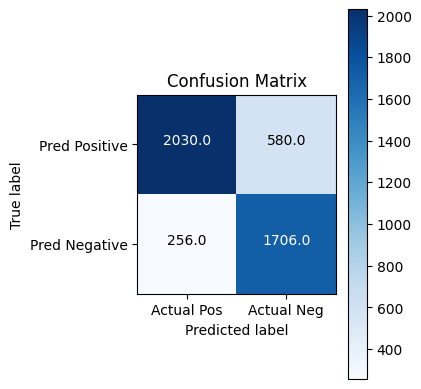

In [45]:
calculate_metrics(y_test,classicKNN_pred)

### Fuzzy KNN Algorithm Explanation

The Fuzzy KNN (F-KNN) algorithm is a variant of the classic K-nearest neighbors (KNN) algorithm that incorporates the principle of membership assignment. In F-KNN, instead of making hard classifications, the algorithm assigns "membership" values to each class for a given test sample. These membership values represent the degree of belongingness of the test sample to each class.

#### Key Features:

- **Soft Classification:** Unlike the classic KNN algorithm, which makes hard classifications, F-KNN provides soft classifications by assigning membership values to each class.
- **Distance-based Weighting:** F-KNN uses distance-based weighting to assign higher weights to closer neighbors and lower weights to farther neighbors when computing class counts.

#### Advantages:

- **Robustness to Noisy Data:** The fuzzy nature of F-KNN allows it to handle noisy data and outliers more effectively compared to hard classification methods.
- **Interpretability:** F-KNN provides interpretable results by assigning membership values to each class, allowing users to understand the degree of confidence in each classification.

#### Limitations:

- **Parameter Sensitivity:** F-KNN performance may be sensitive to the choice of the `k` parameter and the method used for calculating membership values.
- **Computational Complexity:** Computing membership values and weighted counts for each test sample can be computationally intensive, especially for large datasets and high-dimensional feature spaces.
- **Difficulty in Interpretation:** While F-KNN provides soft classifications, interpreting membership values and weighted counts may be challenging, especially for complex datasets.

In [17]:
class FuzzyKNN:
    def __init__(self, k):
        self.k = k  # Number of nearest neighbors to consider
    
    def fit(self, X_train, y_train):
        """
        Fit the Fuzzy KNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            # Calculate distances from the test sample to all training samples
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Find indices of k nearest neighbors
            nearest_neighbor_indices = np.argsort(distances)[:self.k]
            # Get labels of k nearest neighbors
            nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]
            # Calculate membership values for each nearest neighbor
            membership_values = []
            for d in distances[nearest_neighbor_indices]:
                if d != 0:
                    # Avoid division by zero, handle the case when distance is zero
                    membership_values.append(1 / d)
                else:
                    # If distance is zero, assign infinite membership value
                    membership_values.append(float('inf'))
            # Calculate membership-weighted counts for each class label
            label_counts = {}
            for label, membership in zip(nearest_neighbor_labels, membership_values):
                if label in label_counts:
                    label_counts[label] += membership
                else:
                    label_counts[label] = membership
            # Predict the class label with maximum weighted count
            prediction = max(label_counts, key=label_counts.get)
            y_pred.append(prediction)  # Store the predicted label
        return y_pred

In [46]:
fuzzyModel = FuzzyKNN(k=4)  # Define the number of nearest neighbors (k)
fuzzyModel.fit(X_train, y_train)  # Train the model
fuzzy_pred = fuzzyModel.predict(X_test)  # Make predictions

		Predicted Positive	Predicted Negative
Actual Positive		2000			406
Actual Negative		286			1880

Precision: 0.8312551953449709
Recall: 0.8748906386701663
F1 Score: 0.8525149190110827
Accuracy: 0.8486439195100612


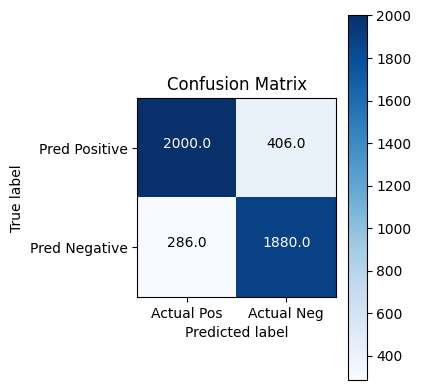

In [47]:
calculate_metrics(y_test,fuzzy_pred)

### Weight Adjusted KNN Algorithm Explanation

The Weight Adjusted KNN algorithm is a variant of the classic K-nearest neighbors (KNN) algorithm that incorporates attribute weighting. In Weight Adjusted KNN, instead of treating all nearest neighbors equally, the algorithm assigns weights to each neighbor based on a kernel function. These weights are used to adjust the influence of each neighbor in the classification process. Common kernel functions include inverse distance weighting, Gaussian kernel, or Epanechnikov kernel.

#### Key Features:

- **Attribute Weighting:** Weight Adjusted KNN assigns weights to neighbors based on a kernel function, allowing it to give more importance to closer neighbors and less importance to farther neighbors.
- **Flexibility:** The choice of kernel function provides flexibility in adjusting the influence of neighbors based on distance.
- **Robustness to Noise:** By incorporating attribute weighting, Weight Adjusted KNN can reduce the impact of noisy or irrelevant features on the classification process.

#### Advantages:

- **Improved Performance:** Weight Adjusted KNN can potentially improve classification performance by giving more emphasis to relevant neighbors and reducing the influence of outliers.
- **Adaptability:** The choice of kernel function allows Weight Adjusted KNN to adapt to different datasets and classification tasks.
- **Interpretability:** The weights assigned to neighbors provide insights into the contribution of each neighbor to the classification decision.

#### Limitations:

- **Parameter Sensitivity:** Weight Adjusted KNN performance may depend on the choice of the `k` parameter and the kernel function.
- **Computational Complexity:** Computing weights for each neighbor can be computationally intensive, especially for large datasets and high-dimensional feature spaces.
- **Difficulty in Interpretation:** Interpreting the impact of different kernel functions and parameter choices on classification results may require experimentation and analysis.

In [20]:
class WeightAdjustedKNN:
    def __init__(self, k):
        """
        Initialize the WeightAdjustedKNN model.

        Parameters:
        - k (int): Number of nearest neighbors to consider.
        """
        self.k = k
    
    def fit(self, X_train, y_train):
        """
        Fit the WeightAdjustedKNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def _inverse_distance(self, distances):
        """
        Compute the inverse distance weights for the distances.

        Parameters:
        - distances (array-like): Array of distances from a test sample to training samples.

        Returns:
        - weights (array-like): Array of weights computed using the inverse distance.
        """
        return 1 / (distances + 1e-5)  # Avoid division by zero
    
    def _gaussian_kernel(self, distances, sigma=1.0):
        """
        Compute the Gaussian kernel weights for the distances.

        Parameters:
        - distances (array-like): Array of distances from a test sample to training samples.
        - sigma (float): Width parameter of the Gaussian kernel.

        Returns:
        - weights (array-like): Array of weights computed using the Gaussian kernel.
        """
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))
    
    def _epanechnikov_kernel(self, distances):
        """
        Compute the Epanechnikov kernel weights for the distances.

        Parameters:
        - distances (array-like): Array of distances from a test sample to training samples.

        Returns:
        - weights (array-like): Array of weights computed using the Epanechnikov kernel.
        """
        return 3/4 * (1 - (distances ** 2))
    
    def predict(self, X_test, kernel='inverse_distance'):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.
        - kernel (str): Type of kernel function to use ('inverse_distance', 'gaussian', or 'epanechnikov').

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            # Calculate distances from the test sample to all training samples
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Compute weights using the specified kernel function
            if kernel == 'inverse_distance':
                weights = self._inverse_distance(distances)
            elif kernel == 'gaussian':
                weights = self._gaussian_kernel(distances)
            elif kernel == 'epanechnikov':
                weights = self._epanechnikov_kernel(distances)
            else:
                raise ValueError("Invalid kernel function. Choose from 'inverse_distance', 'gaussian', or 'epanechnikov'.")
            # Find indices of k nearest neighbors
            nearest_neighbor_indices = np.argsort(distances)[:self.k]
            # Get labels of k nearest neighbors
            nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]
            # Calculate weighted counts for each class label
            label_weights = {}
            for label, weight in zip(nearest_neighbor_labels, weights):
                if label in label_weights:
                    label_weights[label] += weight
                else:
                    label_weights[label] = weight
            # Predict the class label with maximum weighted count
            prediction = max(label_weights, key=label_weights.get)
            y_pred.append(prediction)  # Store the predicted label
        return y_pred


In [48]:
waModel = WeightAdjustedKNN(k=4)  # Define the number of nearest neighbors (k)
waModel.fit(X_train, y_train)  # Train the model

In [51]:
weightAdjusted_pred = waModel.predict(X_test, kernel='gaussian')  # Make predictions

		Predicted Positive	Predicted Negative
Actual Positive		1961			436
Actual Negative		325			1850

Precision: 0.8181059657905716
Recall: 0.857830271216098
F1 Score: 0.8374973307708734
Accuracy: 0.8335520559930009


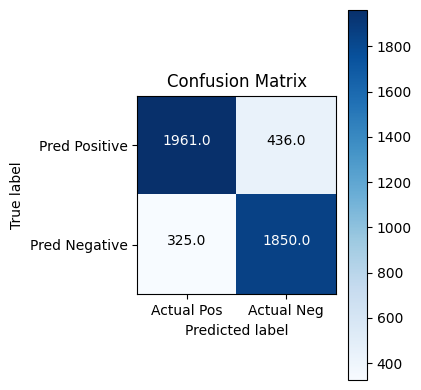

In [52]:
calculate_metrics(y_test, weightAdjusted_pred)

### Hassanat Distance KNN Algorithm Explanation

The Hassanat Distance KNN algorithm is a variant of the classic K-nearest neighbors (KNN) algorithm that proposes an advanced way to measure the distance between two data points. Instead of using the traditional Euclidean distance, Hassanat distance metric is utilized, which involves the usage of maximum and minimum vector points.

**Hassanat Distance Calculation:**
   - The Hassanat distance is calculated by finding the maximum and minimum vector points between the two samples and then computing the Euclidean norm of their difference.

#### Key Features:

- **Advanced Distance Metric:** Hassanat Distance KNN uses the Hassanat distance metric, which considers both the maximum and minimum vector points between samples, providing a potentially more informative distance measure compared to Euclidean distance.
- **Robustness to Outliers:** By using the Hassanat distance metric, which considers extreme points in the feature space, Hassanat Distance KNN may be more robust to outliers compared to traditional KNN.
- **Simple Implementation:** Despite the advanced distance metric, the Hassanat Distance KNN algorithm follows a simple implementation similar to the classic KNN algorithm.

#### Advantages:

- **Improved Distance Measure:** Hassanat distance metric may provide improved distance measure, particularly for datasets where the traditional Euclidean distance fails to capture the underlying data distribution effectively.
- **Potential for Better Performance:** By utilizing an advanced distance metric, Hassanat Distance KNN may achieve better performance compared to traditional KNN, especially in scenarios with complex data distributions.

#### Limitations:

- **Computational Complexity:** Computing Hassanat distances for each test sample can be computationally intensive, especially for large datasets and high-dimensional feature spaces.
- **Parameter Sensitivity:** The performance of Hassanat Distance KNN may depend on the choice of the `k` parameter and the behavior of the Hassanat distance metric on the specific dataset.

Overall, Hassanat Distance KNN offers a potentially more informative distance metric compared to traditional KNN, which may lead to improved classification performance in certain scenarios.


In [28]:
class HassanatDistanceKNN:
    def __init__(self, k):
        """
        Initialize the HassanatDistanceKNN model.

        Parameters:
        - k (int): Number of nearest neighbors to consider.
        """
        self.k = k
    
    def fit(self, X_train, y_train):
        """
        Fit the HassanatDistanceKNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def _hassanat_distance(self, x1, x2):
        """
        Compute the Hassanat distance metric between two samples.

        Parameters:
        - x1 (array-like): Feature vector of the first sample.
        - x2 (array-like): Feature vector of the second sample.

        Returns:
        - distance (float): Hassanat distance between the two samples.
        """
        # Example implementation of Hassanat distance metric
        max_vector = np.maximum(x1, x2)  # Compute maximum vector element-wise
        min_vector = np.minimum(x1, x2)  # Compute minimum vector element-wise
        return np.linalg.norm(max_vector - min_vector)  # Compute Euclidean norm of the difference
    
    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            # Calculate Hassanat distances from the test sample to all training samples
            distances = [self._hassanat_distance(x, x_train) for x_train in self.X_train]
            # Find indices of k nearest neighbors
            nearest_neighbor_indices = np.argsort(distances)[:self.k]
            # Get labels of k nearest neighbors
            nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]
            # Predict the class label based on majority voting among nearest neighbors
            prediction = max(set(nearest_neighbor_labels), key=nearest_neighbor_labels.count)
            y_pred.append(prediction)  # Store the predicted label
        return y_pred

In [55]:
hassanatModel = HassanatDistanceKNN(k=4)  # Define the number of nearest neighbors (k)
hassanatModel.fit(X_train, y_train)  # Train the model
hassanat_pred = hassanatModel.predict(X_test)  # Make predictions

		Predicted Positive	Predicted Negative
Actual Positive		2030			580
Actual Negative		256			1706

Precision: 0.7777777777777778
Recall: 0.8880139982502188
F1 Score: 0.829248366013072
Accuracy: 0.8171478565179353


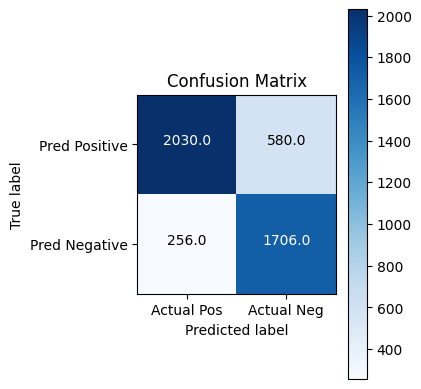

In [56]:
calculate_metrics(y_test, hassanat_pred)

### Ensemble Approach KNN Algorithm Explanation

The Ensemble Approach KNN algorithm is a variant of the classic K-nearest neighbors (KNN) algorithm that utilizes an ensemble approach to address the issue of having a fixed "k" parameter for classification. Instead of using a single value of "k", this algorithm considers a range of "k" values and combines their predictions using a weighted summation approach.

#### Key Features:

- **Ensemble Approach:** Ensemble Approach KNN combines predictions from multiple values of "k" using weighted summation, allowing it to adapt to varying local neighborhood sizes.
- **Dynamic Parameter Selection:** By considering a range of "k" values, Ensemble Approach KNN avoids the need for manually selecting a single fixed value of "k", making it more adaptable to different datasets and classification tasks.

#### Advantages:

- **Improved Robustness:** Ensemble Approach KNN can potentially improve classification robustness by incorporating predictions from multiple neighborhood sizes.
- **Flexibility:** The choice of the maximum "k" value (`k_max`) provides flexibility in adjusting the range of neighborhood sizes considered by the algorithm.

#### Limitations:

- **Computational Complexity:** Ensemble Approach KNN may have higher computational complexity due to considering predictions from multiple "k" values.
- **Parameter Sensitivity:** The performance of Ensemble Approach KNN may depend on the choice of the maximum "k" value and the behavior of the inverse logarithm function on the specific dataset.

In [31]:
class EnsembleApproachKNN:
    def __init__(self, k_max):
        """
        Initialize the EnsembleApproachKNN model.

        Parameters:
        - k_max (int): Maximum value of k to consider for ensemble approach.
        """
        self.k_max = k_max
    
    def fit(self, X_train, y_train):
        """
        Fit the EnsembleApproachKNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def _inverse_logarithm(self, k):
        """
        Compute the inverse logarithm weight for a given k value.

        Parameters:
        - k (int): Value of k.

        Returns:
        - weight (float): Weight computed using the inverse logarithm.
        """
        return 1 / np.log(k + 1)
    
    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            all_distances = np.linalg.norm(self.X_train - x, axis=1)  # Calculate distances to all training samples
            sorted_indices = np.argsort(all_distances)  # Sort indices based on distances
            k_values = np.arange(1, self.k_max + 1, 2)  # Generate odd values of k from 1 to k_max
            weights = [self._inverse_logarithm(k) for k in k_values]  # Compute weights using inverse logarithm
            label_counts = {}  # Initialize dictionary to store label counts weighted by k
            for k, weight in zip(k_values, weights):  # Iterate over k values and weights
                nearest_neighbor_indices = sorted_indices[:k]  # Get indices of k nearest neighbors
                nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]  # Get labels of k nearest neighbors
                for label in nearest_neighbor_labels:  # Update label counts with weighted values
                    if label in label_counts:
                        label_counts[label] += weight
                    else:
                        label_counts[label] = weight
            prediction = max(label_counts, key=label_counts.get)  # Predict the class label with maximum weighted count
            y_pred.append(prediction)  # Store the predicted label
        return y_pred

In [32]:
eaModel = EnsembleApproachKNN(k_max=10)  # Define the maximum value of k
eaModel.fit(X_train, y_train)  # Train the model
ensembleApproach_pred = eaModel.predict(X_test)  # Make predictions

		Predicted Positive	Predicted Negative
Actual Positive		1940			389
Actual Negative		346			1897

Precision: 0.8329755259768141
Recall: 0.8486439195100612
F1 Score: 0.8407367280606718
Accuracy: 0.839238845144357


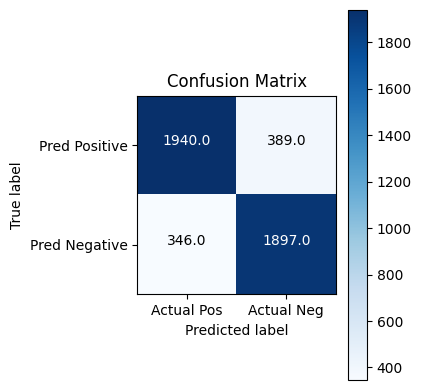

In [33]:
calculate_metrics(y_test, ensembleApproach_pred)

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import NearestNeighbors

# # Generate synthetic dataset
# X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define KNN variants
knn_variants = {
#     "Classic KNN": KNeighborsClassifier(n_neighbors=5),
#     "Adaptive KNN": KNeighborsClassifier(n_neighbors=5),
    "KNN" : predictions,
    "Fuzzy KNN" : Fuzzy_pred,
    "Weight Adjusted KNN" : wKNN_pred,
    "Hassanat Distance KNN" : hKNN_pred,
    "Ensemble Approach KNN" : EKNN_pred,
    "Generalized Mean Distance KNN" : gmdknn_pred
}

# Train and evaluate each variant
for name, y_pred in knn_variants.items():
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}")

    # Visualization of decision boundaries
    plt.figure(figsize=(8, 6))
    plt.title(f"{name} - Decision Boundaries")
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Instance-level explanations
    # Select a random instance from the test set
    instance_idx = np.random.randint(len(X_test))
    instance = X_test[instance_idx].reshape(1, -1)
    instance_label = y_test[instance_idx]

    # Get nearest neighbors
    nn = NearestNeighbors(n_neighbors=5)
    nn.fit(X_train)
    distances, indices = nn.kneighbors(instance)

    # Visualize nearest neighbors
    plt.figure(figsize=(8, 6))
    plt.title(f"{name} - Nearest Neighbors for Instance {instance_idx}")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, label='Training Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label='Test Data')
    plt.scatter(X_test[instance_idx, 0], X_test[instance_idx, 1], c='red', marker='o', label='Query Instance')
    plt.scatter(X_train[indices[0], 0], X_train[indices[0], 1], c='green', marker='^', label='Nearest Neighbors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

    # Analyze feature importance
    permutation_importance_result = permutation_importance(knn, X_train, y_train, n_repeats=30, random_state=42)
    sorted_idx = permutation_importance_result.importances_mean.argsort()
    print(f"Feature importance for {name}:")
    for i in sorted_idx:
        print(f"Feature {i}: {permutation_importance_result.importances_mean[i]:.4f}")
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print()


NameError: name 'predictions' is not defined

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[1989  297]
 [ 504 1782]]
0.8248031496062992
0.8164948453608247
0.7795275590551181
0.8571428571428571


In [ ]:
# Assuming metrics for four models are stored in lists
model_names = ['c4.5 with IG', 'c4.5 with IGR', 'VF c4.5 with IGR', 'CART (gini impurity)']
accuracies = [0.897, 0.902, 0.817, 0.917]
f1_scores = [0.888,0.899,0.817,0.916 ]
precisions = [0.947,0.907,0.802,0.904 ]
recalls = [0.837, 0.892,0.833,0.928]

# Set the width of the bars
bar_width = 0.12

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width+0.01 for x in r1]
r3 = [x + bar_width+0.01 for x in r2]
r4 = [x + bar_width+0.01 for x in r3]

# Plotting the grouped bar plot
plt.figure(figsize=(5, 3))
plt.bar(r1, accuracies, color='blue', width=bar_width, label='Accuracy')
plt.bar(r2, f1_scores, color='orange', width=bar_width, label='F1-score')
plt.bar(r3, precisions, color='green', width=bar_width, label='Precision')
plt.bar(r4, recalls, color='red', width=bar_width, label='Recall')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names, rotation=30)

# Add ylabel and title
plt.ylabel('Scores', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Add a legend
# plt.legend()

# Show the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()